## Plot NCAR Raw data

In [1]:
import zarr
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import os

In [2]:
# %matplotlib widget

In [3]:
# raw_ncar_folder_path = '/home/idies/workspace/turb/data02_02/ncar-low-rate-fixed-dt/'
raw_ncar_folder_path = '/home/idies/workspace/turb/data02_02/ncar-high-rate-fixed-dt/'
save_folder_path = '/home/idies/workspace/Storage/ariel4/persistent/ncar-zarr-code/zarr_reading/visualizations/'

chunk_size=64


var = 't'
variable = 'temperature'

# timestep_range = range(5) # This will definitely crash the Kernel
timestep_nr = 0

In [4]:
# needed for sciserver jobs
%cd /home/idies/workspace/Storage/ariel4/persistent/zarrify-across-network

/home/idies/workspace/Storage/ariel4/persistent/zarrify-across-network


In [5]:
# for timestep_nr in timestep_range:
#     data = xr.open_dataset(raw_ncar_folder_path + "/jhd.00" + str(timestep_nr) + ".nc")


data_xr = xr.open_dataset(raw_ncar_folder_path + "/jhd." + str(timestep_nr).zfill(3) + ".nc", chunks={'nnz': chunk_size, 'nny': chunk_size, 'nnx': chunk_size})

In [6]:
steps = range(0, data_xr['t'].shape[2], 10)

# for i, z in enumerate(z_steps):
#     print(i,z)

### Runtimes

3min 45s +- 4min(!) to load Array `np.array(data[var])`

33.3s to plot using in-memory numpy array (from above)

14min 17s +- 6min for loading data using `data_xr[var][slice]` every time

Skipping the np.array loading takes wayyy too long (>1h for 7 runs atm)

<font color="red">Use np.array(data_xr['e'].isel(nnz=z_indices, nny=slice(None), nnx=slice(None)))!! Only 15sec!</font>

In [7]:
# TODO make this into a function

z_indices = [0]
x_indices = [0]
# z_indices = [2047]
z = 0

# Change this to slice along a different axis
# slice_data = np.array(data_xr[var].isel(nnz=z_indices, nny=slice(None), nnx=slice(None)))
# Load only 512x512
# slice_data = np.array(data_xr[var].isel(nnz=z_indices, nny=slice(0, 512), nnx=slice(0, 512)))
slice_data = np.array(data_xr[var].isel(nnz=slice(0, 512), nny=slice(0, 512), nnx=z_indices))

slice_data = np.squeeze(slice_data)

In [8]:
slice_data.shape

(512, 512)

In [9]:
# slice_data = slice_data[:512, :512]

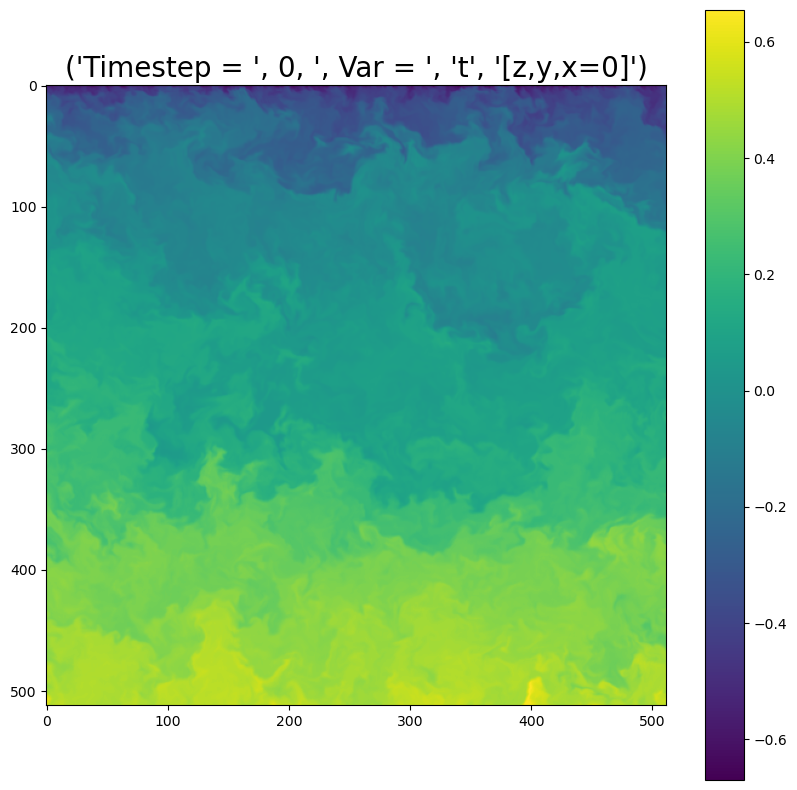

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(slice_data)#, cmap='gist_gray')#, vmin=-.5, vmax=.6)

#     name = "[z,y=" +str(y) + ",x]" # y
# name = "Timestep = ", timestep_nr, ", Var = ", var, "[z=" +str(z) + ",y,x]" # z
name = "Timestep = ", timestep_nr, ", Var = ", var, "[z,y,x=" +str(z) + "]" # x

plt.title(name, fontsize=20)
plt.colorbar()

# Save figures to disk
# plt.savefig(f'visualizations/timestep_' + str(timestep_nr) + '/' + var + "/" + name + '.png')
# plt.close()

## Plot Zarr Written data

In [14]:
zarr_group = zarr.open_group('/home/idies/workspace/turb/data09_01/zarr/sabl2048b_09_prod/sabl2048b09_000.zarr', mode='r')
zarr_group.info

Name,/
Type,zarr.hierarchy.Group
Read-only,True
Store type,zarr.storage.DirectoryStore
No. members,4
No. arrays,4
No. groups,0
Arrays,"energy, pressure, temperature, velocity"


In [18]:
zarr_xr = xr.open_zarr('/home/idies/workspace/turb/data09_01/zarr/sabl2048b_09_prod/sabl2048b09_000.zarr')

In [23]:
slice_data = np.array(zarr_xr[variable].isel(nnz=z_indices, nny=slice(0, 512), nnx=slice(0, 512)))
slice_data = np.squeeze(slice_data)

Text(0.5, 1.0, "('Timestep = ', 0, ', Var = ', 'e', '[z=0,y,x]')")

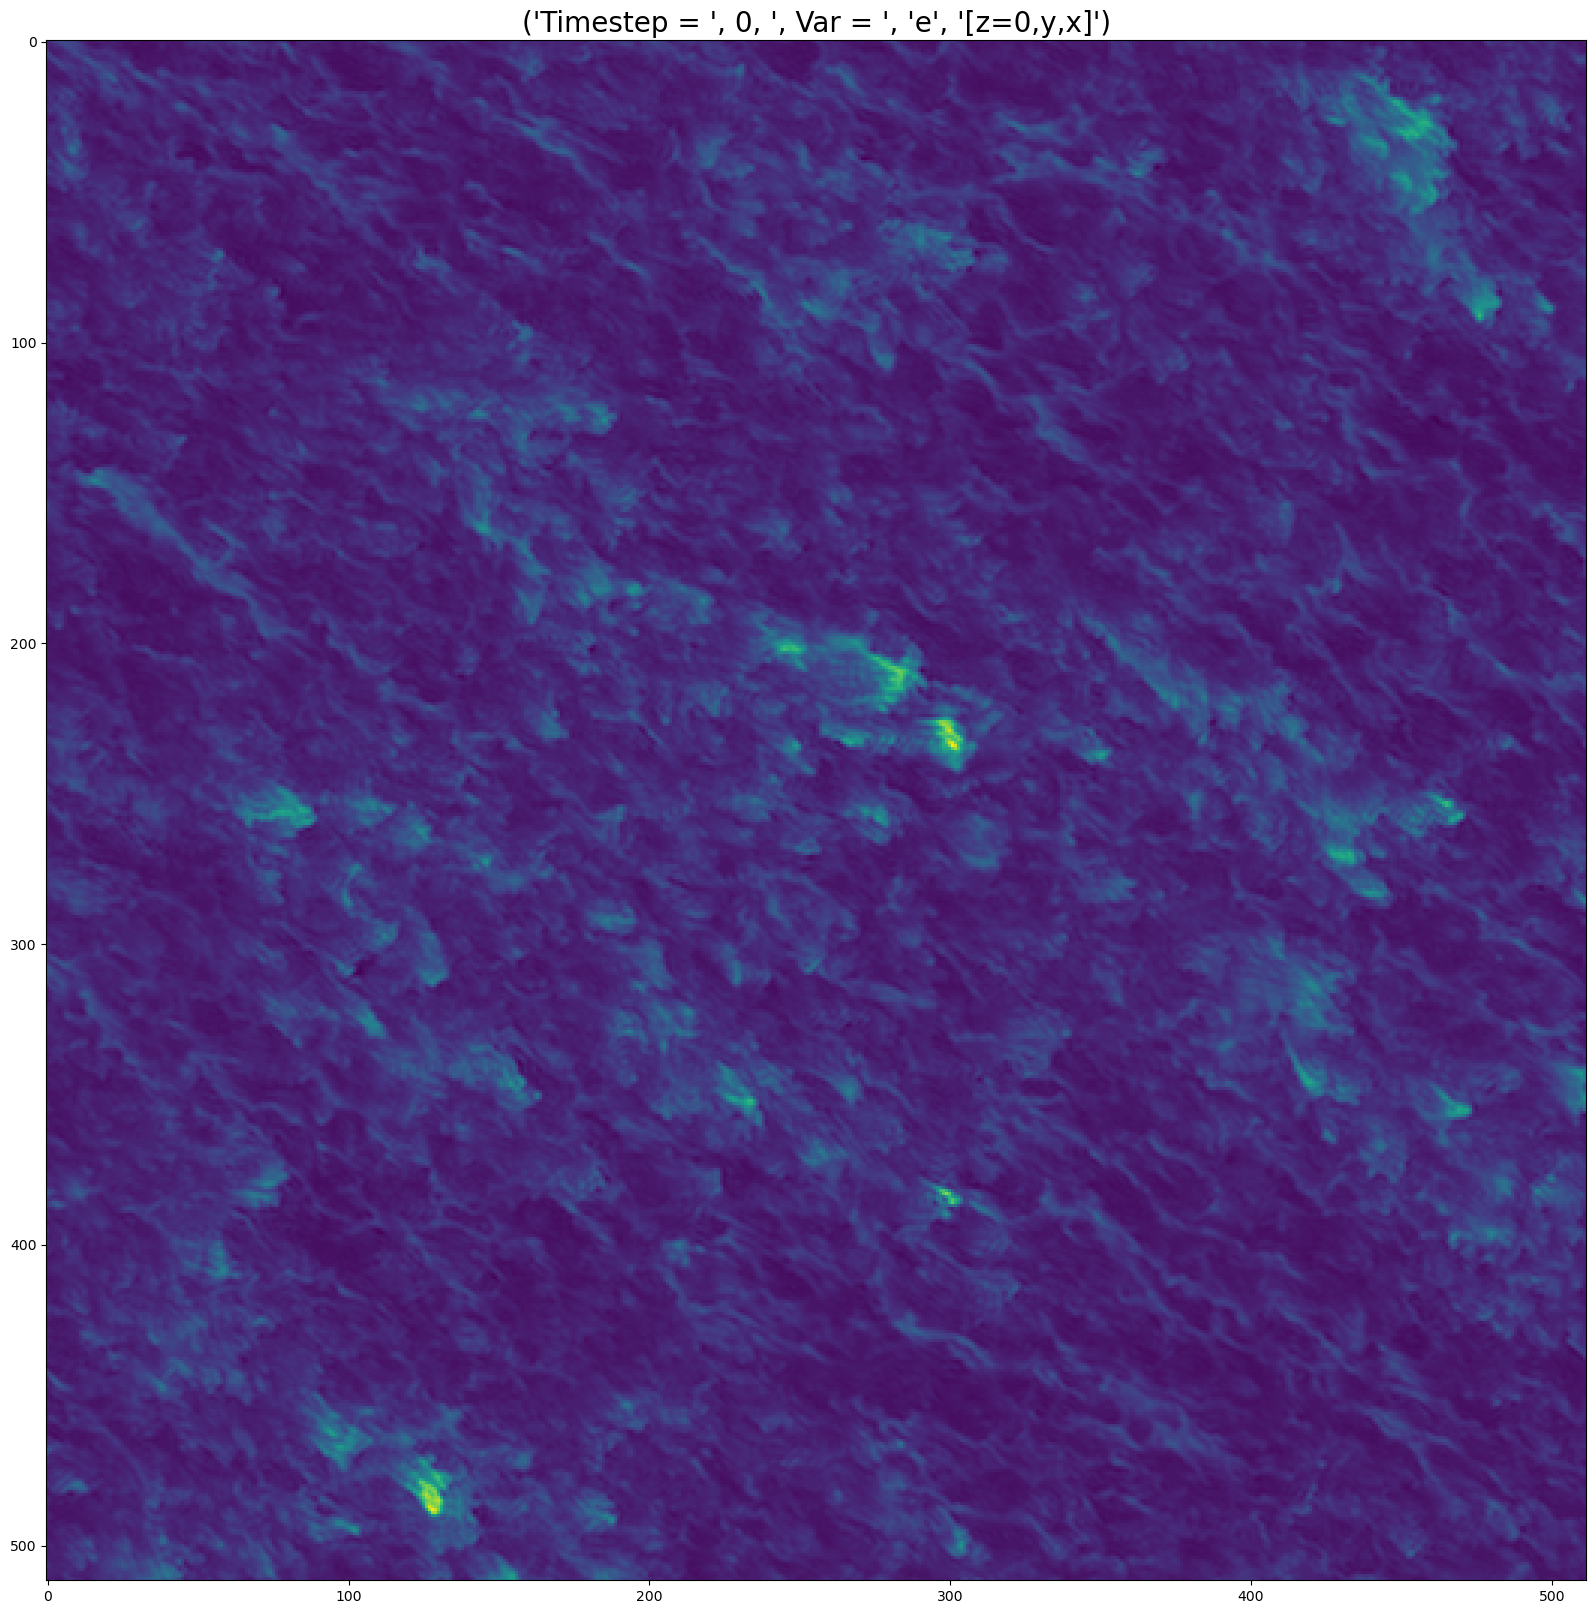

In [24]:
plt.figure(figsize=(20,20))
plt.imshow(slice_data)#, cmap='gist_gray')#, vmin=-.5, vmax=.6)

#     name = "[z,y,x=" + str(x) + "]" # x
#     name = "[z,y=" +str(y) + ",x]" # y
name = "Timestep = ", timestep_nr, ", Var = ", var, "[z=" +str(z) + ",y,x]" # z

plt.title(name, fontsize=20)

# Save figures to disk
# plt.savefig(f'visualizations/timestep_' + str(timestep_nr) + '/' + var + "/" + name + '.png')
# plt.close()

### Plot both using Zarrify-Across-Network, to make chunk matching between original and zarr easy

In [26]:
import sys
sys.path.append('./zarrify-across-network/src/')

from dataset import NCAR_Dataset

ModuleNotFoundError: No module named 'dataset'

## Movie

In [9]:
z_indices = slice(0,50)

slice_data = np.array(data_xr[var].isel(nnz=z_indices, nny=slice(None), nnx=slice(None))) # Change this to slice along a different axis

slice_data = np.squeeze(slice_data)

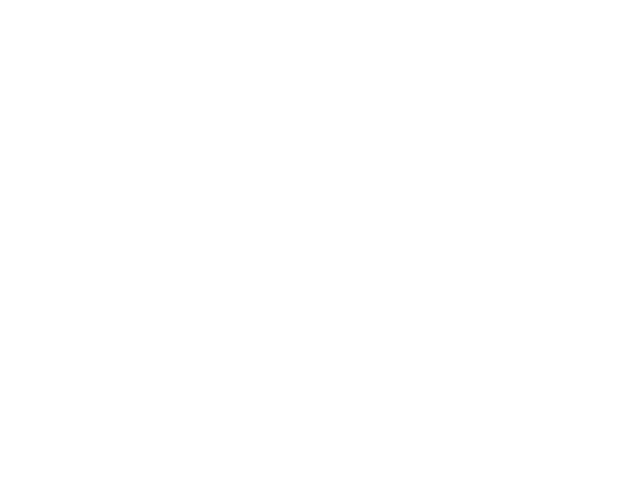

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation



def update(frame):
    plt.clf()  # Clear the previous frame
    plt.imshow(slice_data[frame], cmap='viridis')  # Display the current 2D slice
    plt.title(f'Frame {frame + 1}')

    
fig = plt.figure()
ani = FuncAnimation(fig, update, frames=len(slice_data), repeat=False)



#### This takes super long - strided access

In [ ]:
# x_indices = [0]
# x = 0

# slice_data = np.array(data_xr[var].isel(nnz=slice(None), nny=slice(None), nnx=x_indices)) # Change this to slice along a different axis

# slice_data = np.squeeze(slice_data)

In [ ]:
# plt.figure(figsize=(20,20))
# plt.imshow(slice_data)#, cmap='gist_gray')#, vmin=-.5, vmax=.6)

# #     name = "[z,y,x=" + str(x) + "]" # x
# #     name = "[z,y=" +str(y) + ",x]" # y
# name = "[z,y,x=" +str(x) +"]" # z

# plt.title(name, fontsize=20)

#         # plt.savefig(f'visualizations/timestep_' + str(timestep_nr) + '/' + var + "/" + name + '.png')
#         # plt.close()

### Make a sequence of plots

Then join them

In [ ]:
vars = list(data_xr.variables)
# vars.remove('u')
vars

In [ ]:
# z_indices = list(range(0, 2000, 10))


# for var in vars:
#     for z in z_indices:
#         # Fastest way to load Xarray data in memory
#         slice_data = np.array(data_xr[var].isel(nnz=z_indices, nny=slice(None), nnx=slice(None))) # Change this to slice along a different axis

#         plt.figure(figsize=(20,20))
#         plt.imshow(slice_data, cmap='gist_gray')#, vmin=-.5, vmax=.6)

#     #     name = "[z,y,x=" + str(x) + "]" # x
#     #     name = "[z,y=" +str(y) + ",x]" # y
#         name = "[z=" +str(z) + ",y,x]" # z

#         plt.title(name, fontsize=20)

#         plt.savefig(f'visualizations/timestep_' + str(timestep_nr) + '/' + var + "/" + name + '.png')
#         plt.close()

## Create movie

In [ ]:
%cd visualizations

<font color="orange">TODO fix wrong order of frames</font>

In [ ]:
def extract_number_from_filename(filename):
    # Extract the numeric part of the filename
    # Assumes the filename format is 'y=NUMBER.png'
    return int(filename.split('=')[1].split(',')[0])

In [ ]:
# # Create GIF from PNG files
# from PIL import Image

# for var in vars:
#     png_directory = os.path.join('timestep_' + str(timestep_nr), var)
#     png_files = [file for file in os.listdir(png_directory) if file.endswith('.png')]
#     png_files.sort(key=extract_number_from_filename)
    
# #     print(png_files)
# #     break

#     frames = []

#     for png_file in png_files:
#         png_path = os.path.join(png_directory, png_file)
#         image = Image.open(png_path)
#         frames.append(image)

#     output_gif_path = os.path.join(png_directory,'movie.gif')
#     frames[0].save(output_gif_path, save_all=True, append_images=frames[1:], duration=200, loop=0)

### Figuring out why E is mostly black

Answer: Values at top are highest by orders of magnitude. Lower in the array they are all insignificant, hence the plots being mostly dark

In [ ]:
# e_arr = np.array(data_xr['e'][:,:,10])
# e_arr

In [ ]:
# plt.figure(figsize=(16,16))

# plt.title("Energy Heatmap at [z,y,x=10]", fontsize=20)

# plt.imshow(e_arr,cmap='hot')

In [ ]:
# plt.hist(e_arr.flatten(), bins=10, color='blue', alpha=0.7)

In [ ]:
# t_arr = np.array(data_xr['t'][:,:,10])

In [ ]:
# plt.figure(figsize=(16,16))

# plt.title("Temperature Heatmap at [z,y,x=10]", fontsize=20)

# plt.imshow(t_arr,cmap='hot')

In [ ]:
# plt.hist(t_arr.flatten(), bins=10, color='blue', alpha=0.7)